<a href="https://colab.research.google.com/github/kgreed4/parkisons_exploration/blob/main/voicedata_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voice Data EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons = fetch_ucirepo(id=174)

# data (as pandas dataframes)
X = parkinsons.data.features
y = parkinsons.data.targets

# metadata
print(parkinsons.metadata)

# variable information
print(parkinsons.variables)

{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'published_in': 'BioMedical Engineering OnLine', 'year': 2007, 'url': 'https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b8

In [ ]:
parkinsons.data.features

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
attr = list(parkinsons.data.features)

In [ ]:
parkinsons.data.targets

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [ ]:
# Filter y so it only counts how many values are 1
print('With PD: ', len(y.loc[y['status'] == 1]))
print('Without PD: ', len(y.loc[y['status'] == 0]))

With PD:  147
Without PD:  48


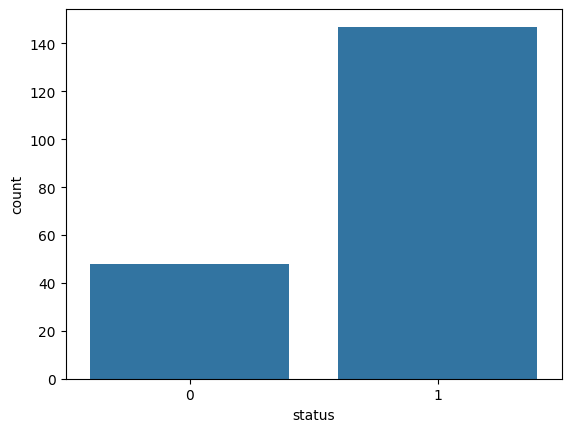

In [ ]:
# Visualize the status distribution
sns.countplot(x='status', data=y)

# Show the plot
plt.show()

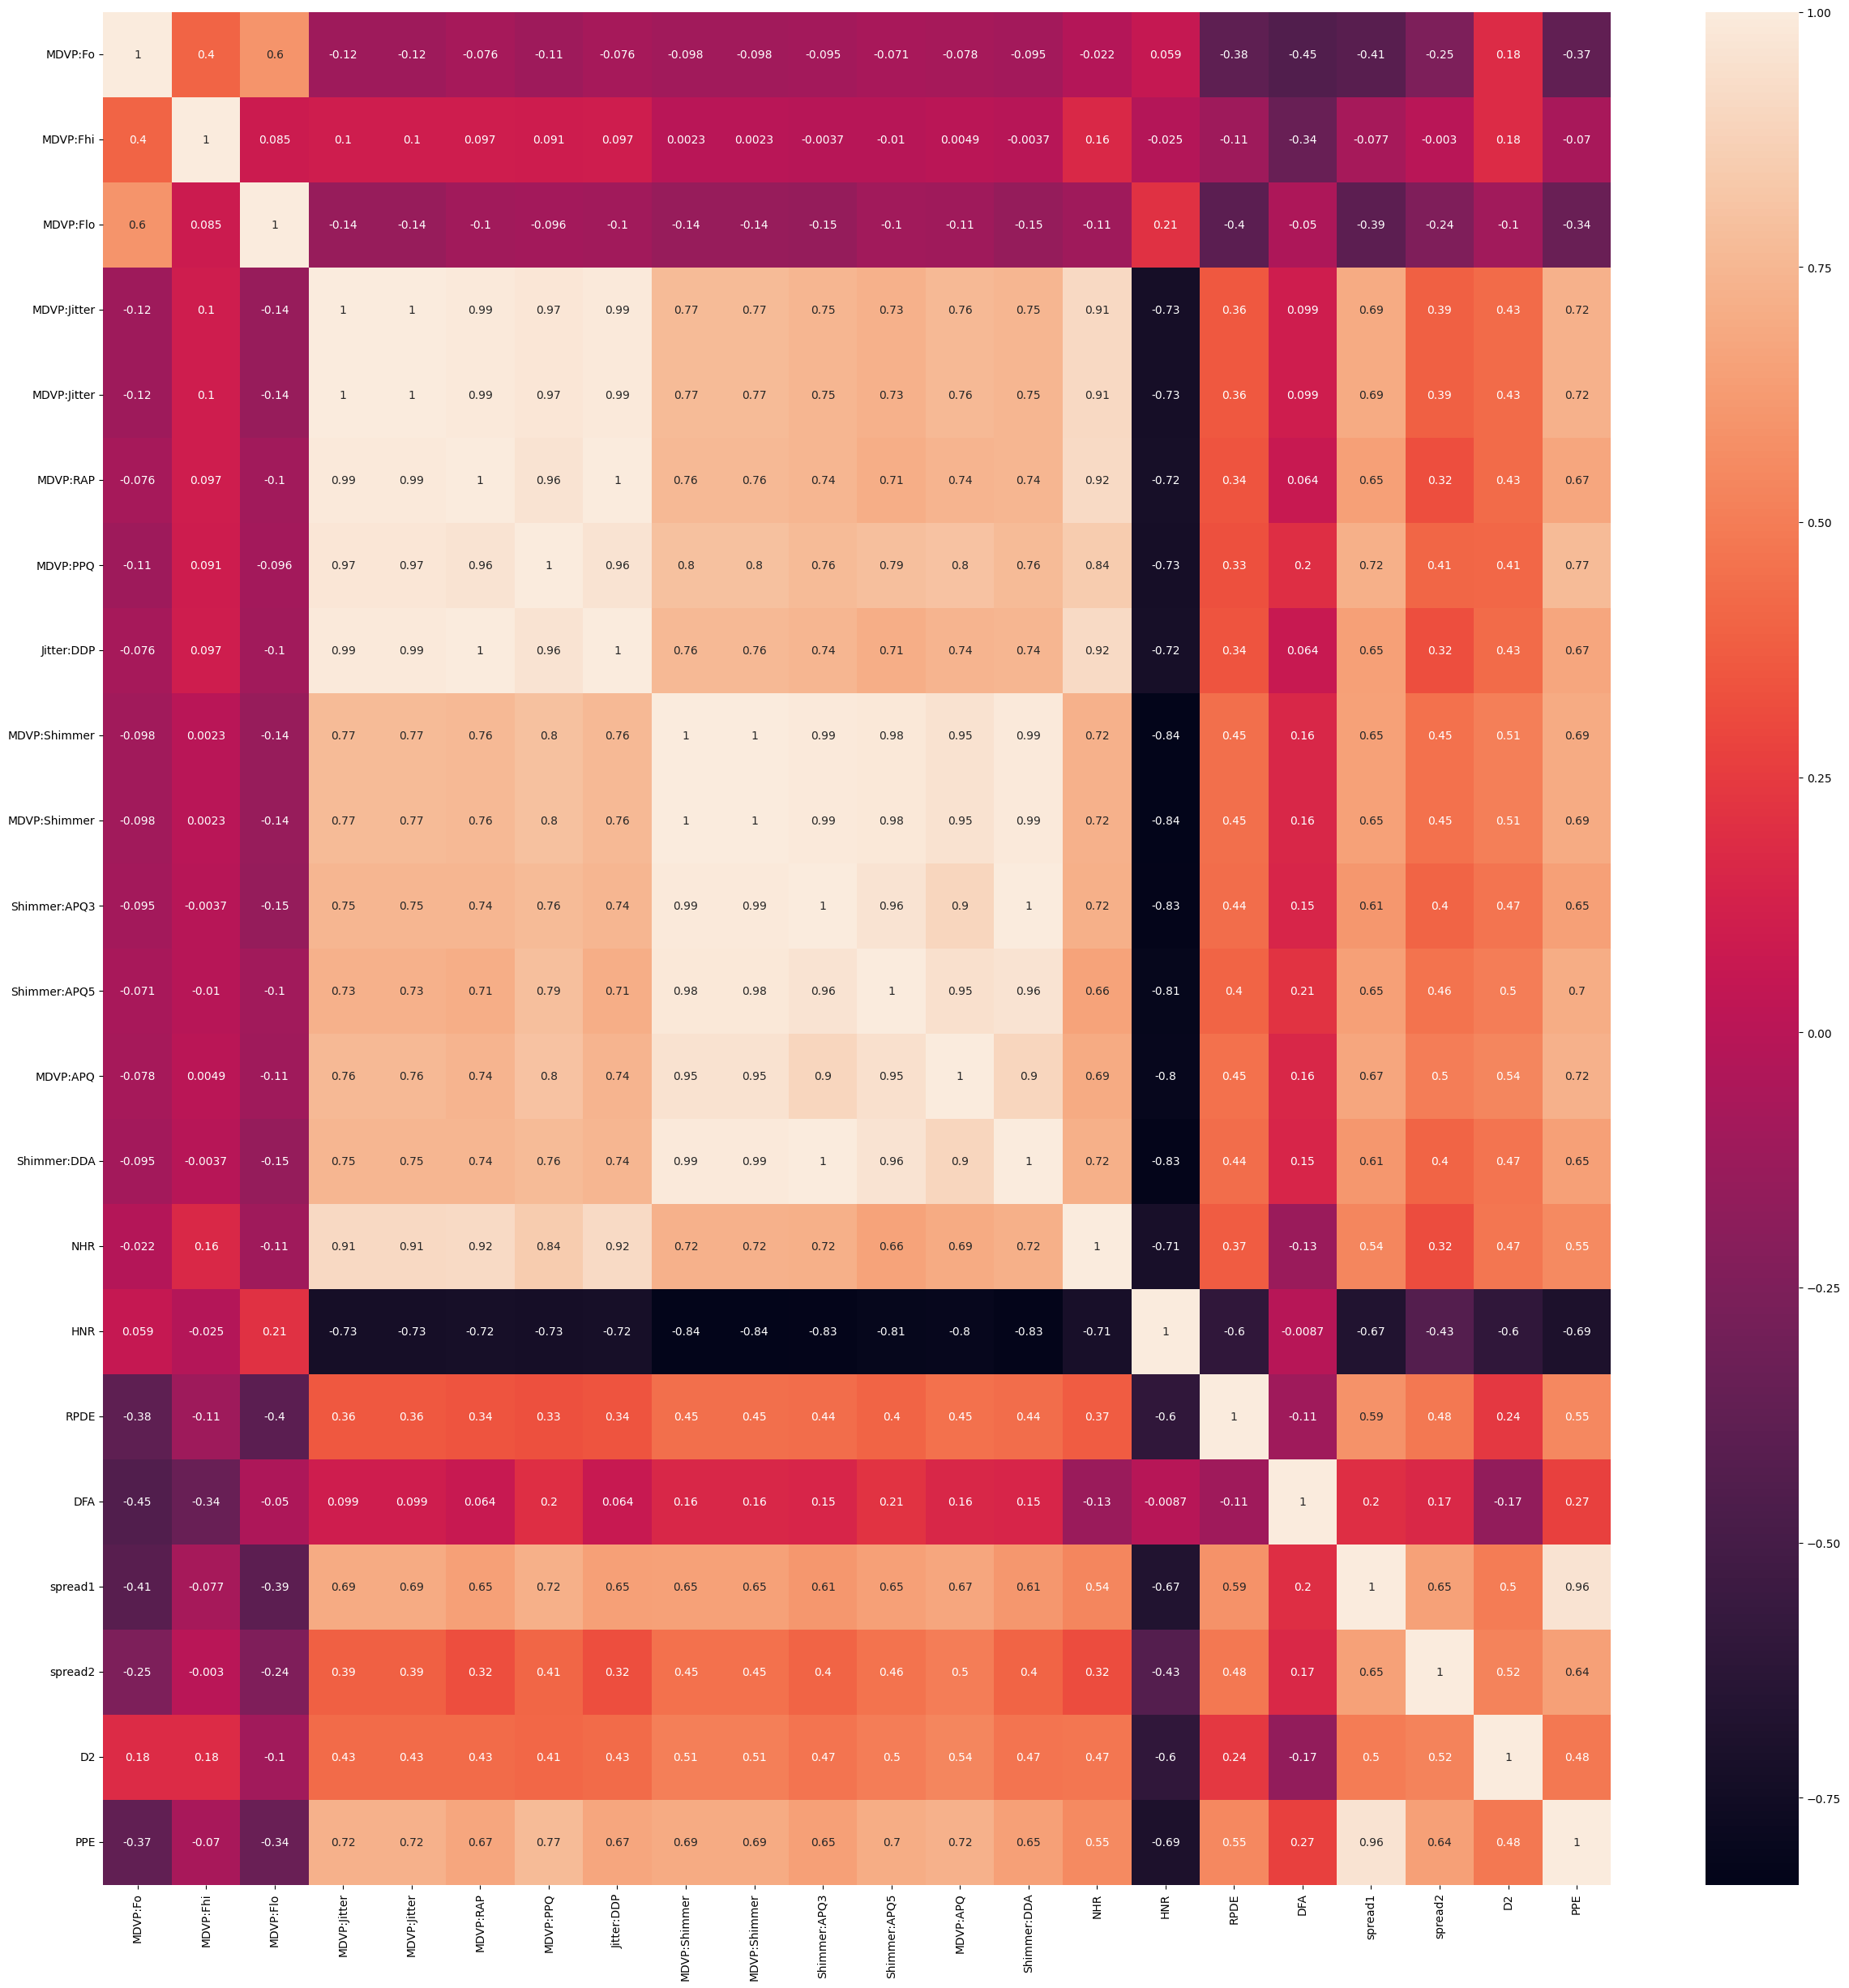

In [ ]:
# Create a confusion matrix showing corrrelation
plt.figure(figsize=(30, 30))
sns.heatmap(X.corr(), annot=True)

# Show the plot
plt.show()

In [ ]:
# Rename y column status
y.columns = ['status']

# Show the head of y
y.head()

# Combine X and y
y = pd.DataFrame(y)
df = pd.concat([X, y], axis=1)

# Show the head of df
df.head()

# Group by status and see the avgs per category
#df.groupby('status').mean()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.0
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.0
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.0
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.0
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.0


# SVC Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Split X and y into train, val, test with a 70, 15, 15 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=0)

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Train SVM Model
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0, random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [ ]:
# Use cross validation with val set
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)

print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.85714286 0.81481481 0.92592593 0.7037037  0.88888889]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
# Training Accuracy
print('Training accuracy: {}'.format(model.score(X_train, y_train)))

# Validation Accuracy
print('Validation accuracy: {}'.format(model.score(X_val, y_val)))

# Test Accuracy
print('Test accuracy: {}'.format(model.score(X_test, y_test)))

Training accuracy: 0.8897058823529411
Validation accuracy: 0.7931034482758621
Test accuracy: 0.8666666666666667


# Obtaining New Voice Memos

In [ ]:
import librosa
import numpy as np
import soundfile as sf

# Load the audio file
def load_audio(audio_path, sr=None):
    y, sr = sf.read(audio_path)
    return y, sr

# Extract features from audio
def extract_features(y, sr):
    features = []

    # Extract features using librosa
    # Fundamental frequency features
    f0, voiced_flag = librosa.piptrack(y=y, sr=sr)
    features.append(np.mean(f0)) # MDVP:Fo(Hz)
    features.append(np.max(f0)) # MDVP:Fhi(Hz)
    features.append(np.min(f0)) # MDVP:Flo(Hz)

    # Jitter features
    jitter = librosa.effects.split(y, top_db=20)
    features.append(librosa.feature.rms(y=y[jitter], frame_length=20, hop_length=10).mean()) # MDVP:Jitter(%)
    features.append(np.mean(np.abs(np.diff(f0)))) # MDVP:Jitter(Abs)

    # Shimmer features
    shimmer = librosa.effects.split(y, top_db=40)

    if shimmer.size > 0:
        shimmer_rms = [librosa.feature.rms(y=y[start:end], frame_length=20, hop_length=10).mean() for start, end in shimmer]
        features.append(np.mean(shimmer_rms)) # MDVP:Shimmer
        # Compute the mean second-order difference of the signal amplitude as a proxy for sharpness
        sharpness = [np.mean(np.diff(np.abs(np.diff(y[start:end])))) for start, end in shimmer]
        features.append(np.mean(sharpness)) # Shimmer:APQ
    else:
        features.append(0) # If shimmer is empty, set to 0
        features.append(0) # If shimmer is empty, set to 0

    #features.append(librosa.feature.rms(y=y[shimmer], frame_length=20, hop_length=10).mean()) # MDVP:Shimmer
    #features.append(np.mean(librosa.feature.sharpness(y=y[shimmer]))) # Shimmer:APQ

    # Other features
    features.append(librosa.effects.split(y, top_db=60).shape[0]) # NHR
    features.append(librosa.effects.split(y, top_db=60).shape[0]) # HNR

    return features

In [ ]:
!git clone https://git.ffmpeg.org/ffmpeg.git ffmpeg

Cloning into 'ffmpeg'...
remote: Enumerating objects: 27016, done.
remote: Counting objects: 100% (27016/27016), done.
remote: Compressing objects: 100% (12756/12756), done.
remote: Total 715080 (delta 20166), reused 19045 (delta 14199)
Receiving objects: 100% (715080/715080), 178.65 MiB | 11.15 MiB/s, done.
Resolving deltas: 100% (577357/577357), done.


In [ ]:
!ffmpeg -i '/content/The Joyce Center 3.m4a' -acodec libmp3lame -q:a 2 output.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Load audio
audio_path = '/content/output.mp3'

y, sr = load_audio(audio_path)
features = extract_features(y, sr)

In [ ]:
print(attr)
print(features)

['MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter', 'MDVP:Jitter', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
[10.101968580401234, 3995.0870021255755, 0.0, 0.009124197, 12.99704069229203, 0.031040337, -1.8954581374536242e-07, 1, 1]


In [ ]:
# Predict with my audio
y_pred = model.predict([features])
print(y_pred)

ValueError: X has 9 features, but SVC is expecting 22 features as input.